In [1]:
import numpy as np
import scipy.stats

In [2]:
data = [8.1, 8.2, 8.1, 8.2, 8.2, 7.4, 7.3, 7.4, 8.1, 8.1, 7.9, 7.8, 8.2, 7.9, 7.9, 8.1, 8.1]
data = np.array(data)

In [3]:
def init():
    mu1 = np.random.random_sample() * 4 + 6.0
    mu2 = np.random.random_sample() * 4 + 6.0
    var1 = np.random.random_sample() * 2.0
    var2 = np.random.random_sample() * 2.0
    w = np.random.random_sample()
    return mu1, mu2, var1, var2, w

In [4]:
def get_prob(x, mu, var):
    return scipy.stats.norm(mu, np.sqrt(var)).pdf(x)

In [7]:
def e_step(mu1, mu2, var1, var2, w):
    soft_label = np.zeros(shape = data.shape)
    for i, x in enumerate(data):
        soft_label[i] = (w * get_prob(x, mu1, var1)) / (w * get_prob(x, mu1, var1) + (1 - w) * get_prob(x, mu2, var2))
    return soft_label

In [8]:
def m_step(mu1, mu2, var1, var2, w, soft_label):
    mu1 = np.sum(data * soft_label) / np.sum(soft_label)
    mu2 = np.sum(data * (1.0 - soft_label)) / np.sum(1.0 - soft_label)
    var1 = np.sum((data - mu1) * (data - mu1) * soft_label) / np.sum(soft_label)
    var2 = np.sum((data - mu2) * (data - mu2) * (1.0 - soft_label)) / np.sum(1.0 - soft_label)
    w = np.sum(soft_label) / data.shape[0]
    return mu1, mu2, var1, var2, w

In [9]:
def EM():
    mu1, mu2, var1, var2, w = init()
    for i in range(100):
        soft_label = e_step(mu1, mu2, var1, var2, w)
        mu1, mu2, var1, var2, w = m_step(mu1, mu2, var1, var2, w, soft_label)
    return mu1, mu2, var1, var2, w

In [10]:
res_list = []
for i in range(100):
    res_list.append(EM())

C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: invalid value encountered in double_scalars
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)
C:\Users\AndrewHuang\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1653: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0)
C:\Users\AndrewHuang\Anaconda3\lib\si

In [12]:
res_list

[(7.695302865985982,
  8.140259885948243,
  0.07709976703473274,
  0.002406215651275092,
  0.44742167541686334),
 (8.140259885948247,
  7.695302865985983,
  0.0024062156512750957,
  0.07709976703473263,
  0.5525783245831367),
 (nan, nan, nan, nan, nan),
 (8.140259885948245,
  7.695302865985982,
  0.0024062156512750935,
  0.0770997670347328,
  0.5525783245831366),
 (nan, nan, nan, nan, nan),
 (7.36666658783838,
  8.06428536209794,
  0.0022222248498255906,
  0.01658185840185911,
  0.17647015254193785),
 (nan, nan, nan, nan, nan),
 (8.140259885948243,
  7.695302865985984,
  0.0024062156512750913,
  0.077099767034733,
  0.5525783245831364),
 (8.140259885948243,
  7.695302865985984,
  0.0024062156512750913,
  0.0770997670347329,
  0.5525783245831367),
 (8.140259885948245,
  7.695302865985983,
  0.002406215651275091,
  0.07709976703473284,
  0.5525783245831368),
 (8.140259885948247,
  7.695302865985983,
  0.0024062156512750957,
  0.07709976703473263,
  0.5525783245831367),
 (8.14025988594824

In [15]:
res_conv_list = []
for res in res_list:
    if res[0] < 1e5:
        res_conv_list.append(res)

In [16]:
res_conv_list

[(7.695302865985982,
  8.140259885948243,
  0.07709976703473274,
  0.002406215651275092,
  0.44742167541686334),
 (8.140259885948247,
  7.695302865985983,
  0.0024062156512750957,
  0.07709976703473263,
  0.5525783245831367),
 (8.140259885948245,
  7.695302865985982,
  0.0024062156512750935,
  0.0770997670347328,
  0.5525783245831366),
 (7.36666658783838,
  8.06428536209794,
  0.0022222248498255906,
  0.01658185840185911,
  0.17647015254193785),
 (8.140259885948243,
  7.695302865985984,
  0.0024062156512750913,
  0.077099767034733,
  0.5525783245831364),
 (8.140259885948243,
  7.695302865985984,
  0.0024062156512750913,
  0.0770997670347329,
  0.5525783245831367),
 (8.140259885948245,
  7.695302865985983,
  0.002406215651275091,
  0.07709976703473284,
  0.5525783245831368),
 (8.140259885948247,
  7.695302865985983,
  0.0024062156512750957,
  0.07709976703473263,
  0.5525783245831367),
 (8.140259885948247,
  7.695302865985983,
  0.0024062156512750957,
  0.07709976703473263,
  0.55257832

In [17]:
import matplotlib.pyplot as plt

In [20]:
res_conv_list = np.array(res_conv_list)

In [22]:
res_conv_list

array([[7.69530287e+00, 8.14025989e+00, 7.70997670e-02, 2.40621565e-03,
        4.47421675e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [7.36666659e+00, 8.06428536e+00, 2.22222485e-03, 1.65818584e-02,
        1.76470153e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.14025989e+00, 7.69530287e+00, 2.40621565e-03, 7.70997670e-02,
        5.52578325e-01],
       [8.06428536e+00, 7.3666

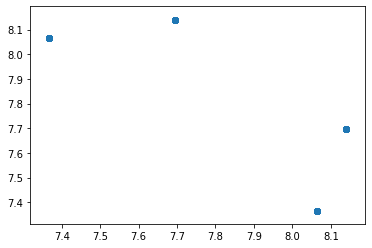

In [21]:
plt.scatter(res_conv_list[:, 0], res_conv_list[:, 1])

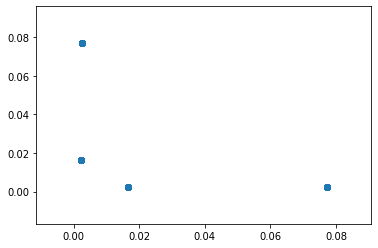

In [23]:
plt.scatter(res_conv_list[:, 2], res_conv_list[:, 3])

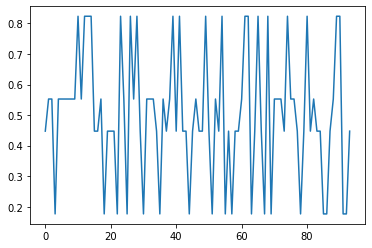

In [24]:
plt.plot(res_conv_list[:, 4])

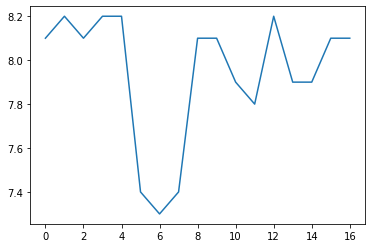

In [26]:
plt.plot(data)